# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường 

---
## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [4]:
# Chuẩn bị dữ liệu
import pandas as pd

# Đọc dữ liệu
data = pd.read_csv("pima-indians-diabetes.csv")

# Xem 5 dòng đầu
print(data.head())

# Tạo biến mới tương tự "PriceperSqm"
data['GlucosePerBMI'] = data['Glucose'] / data['BMI']

# Gom nhóm theo tuổi trung bình để trực quan hóa
data_sorted = data.sort_values('Glucose', ascending=False)

# Xem dữ liệu sau xử lý
data_sorted.head()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucosePerBMI
661,1,199,76,43,0,42.9,1.394,22,1,4.638695
561,0,198,66,32,274,41.3,0.502,28,1,4.794189
579,2,197,70,99,0,34.7,0.575,62,1,5.677233
228,4,197,70,39,744,36.7,2.329,31,0,5.367847
8,2,197,70,45,543,30.5,0.158,53,1,6.459016


## 2. Trực quan hóa dữ liệu với thư viện Matplotlib

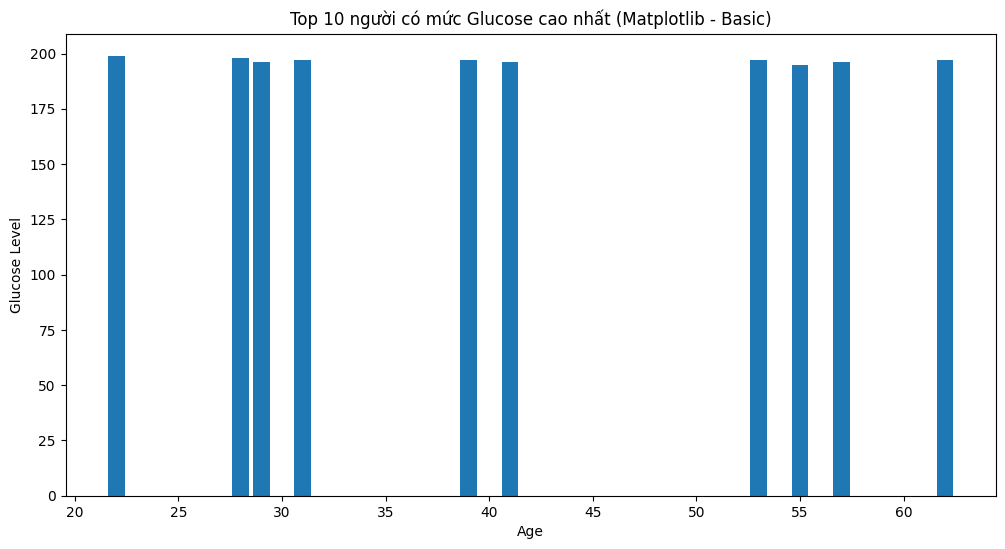

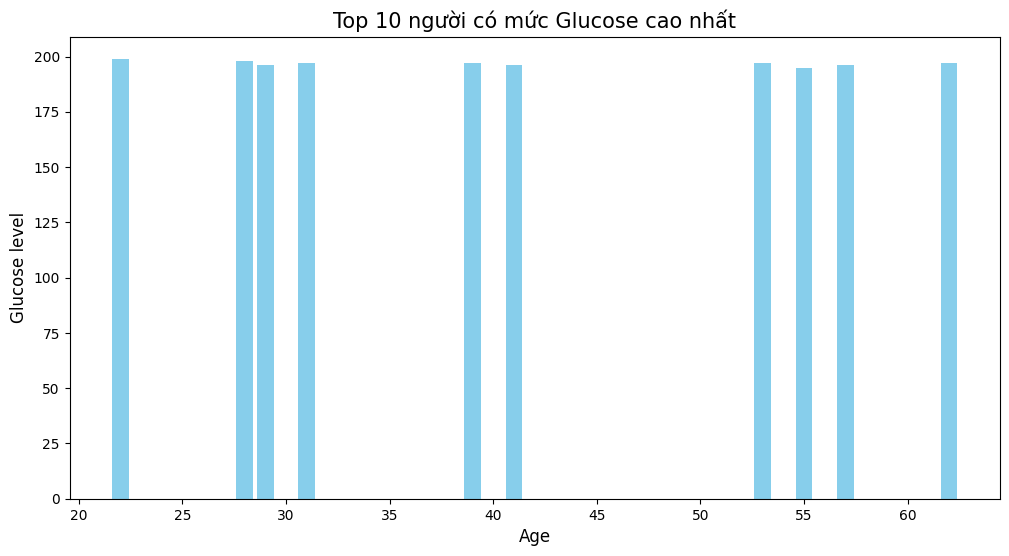

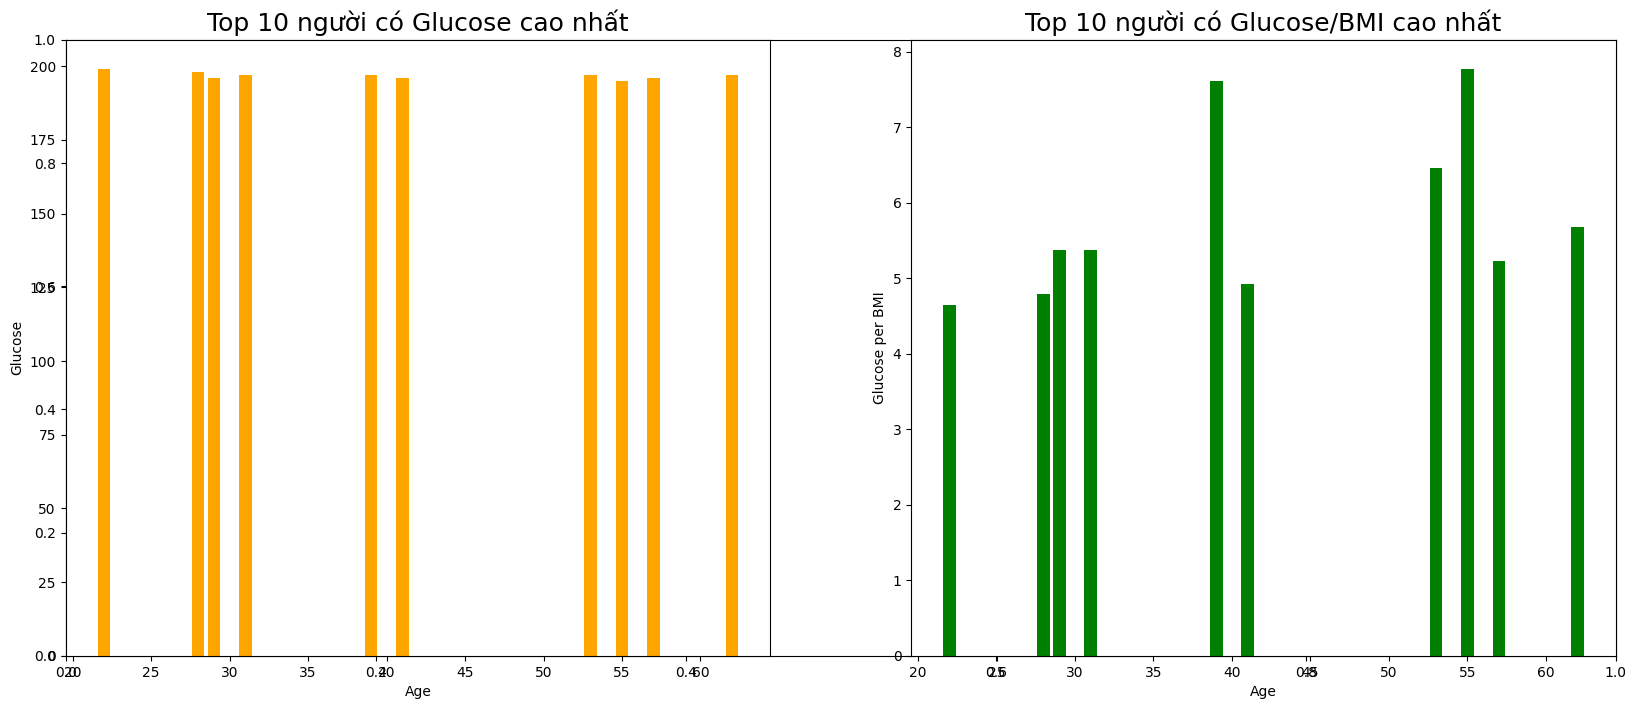

In [5]:
# Trực quan hóa dữ liệu với Matplotlib
import matplotlib.pyplot as plt

# Lấy top 10 theo Glucose
top10 = data_sorted[:10]

# Case 1: Basic
plt.figure(figsize=(12,6))
x = top10['Age']
y = top10['Glucose']
plt.bar(x, y)
plt.title('Top 10 người có mức Glucose cao nhất (Matplotlib - Basic)')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

# Case 2: Advanced 1
plt.figure(figsize=(12,6))
plt.bar(x, y, color='skyblue')
plt.title('Top 10 người có mức Glucose cao nhất', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Glucose level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Case 3: Advanced 2 (2 biểu đồ cạnh nhau)
fig, ax = plt.subplots(figsize=(20,8))

y1 = top10['GlucosePerBMI']

plt.subplot(1,2,1)
plt.bar(x, y, color='orange')
plt.title('Top 10 người có Glucose cao nhất', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Glucose')

plt.subplot(1,2,2)
plt.bar(x, y1, color='green')
plt.title('Top 10 người có Glucose/BMI cao nhất', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Glucose per BMI')

plt.show()

## 3. Trực quan hóa dữ liệu với thư viện Seaborn

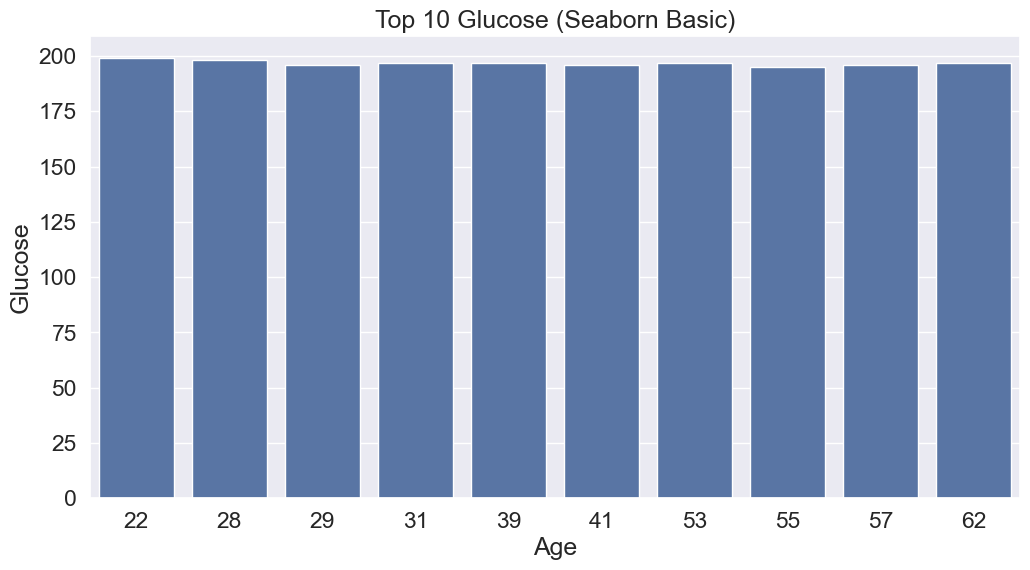

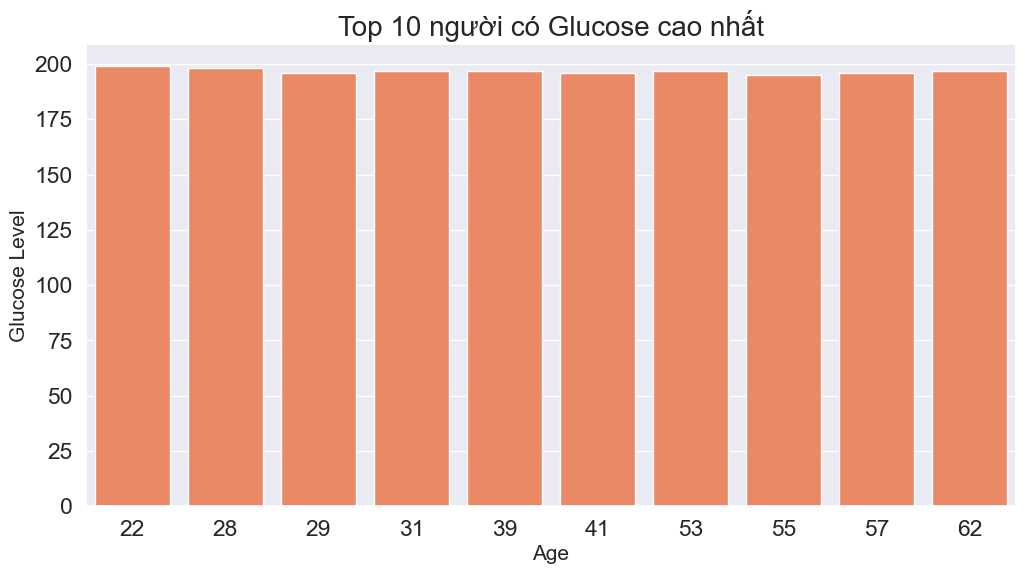

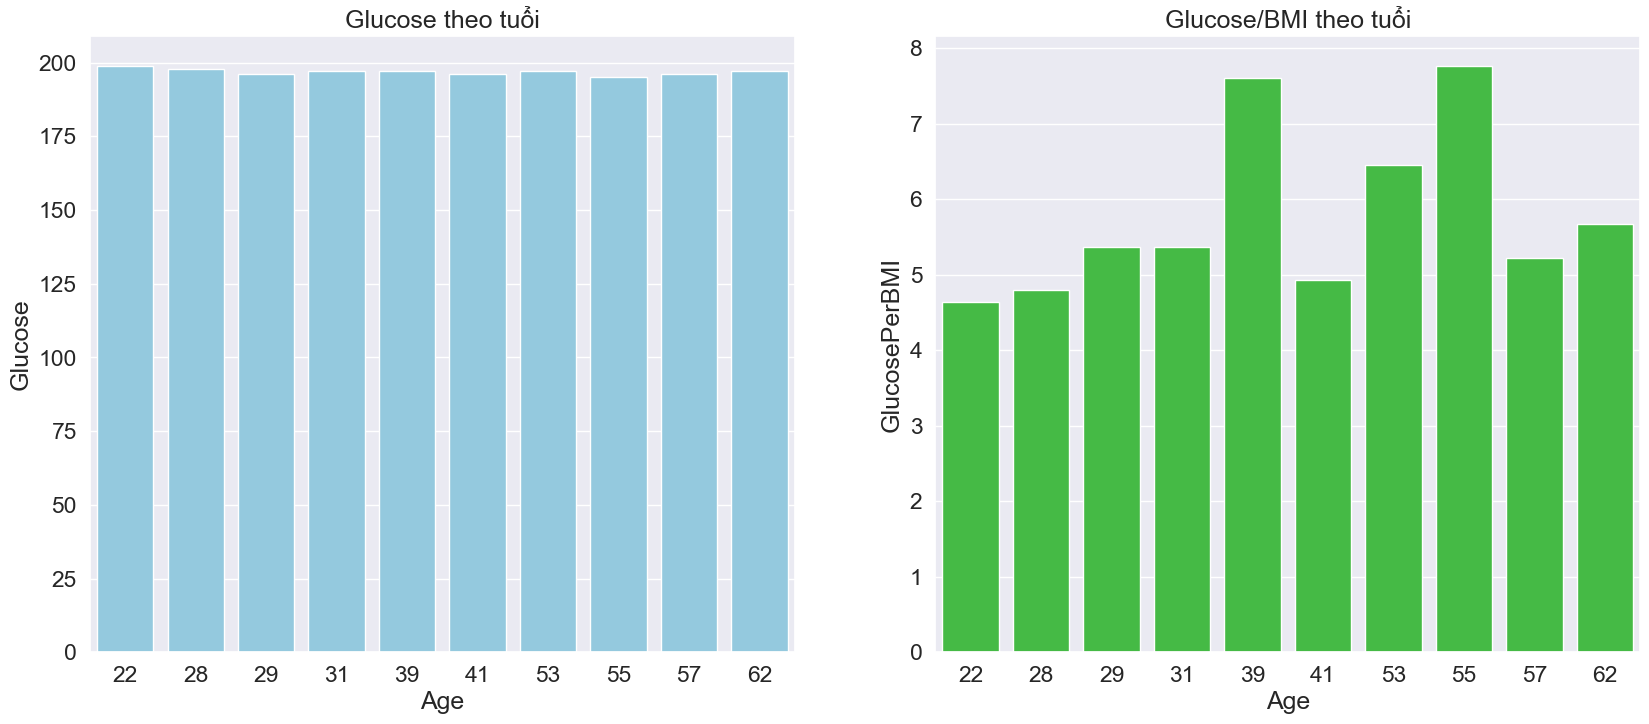

In [7]:
# Trực quan hóa dữ liệu với Seaborn
import seaborn as sns

# Case 1: Basic
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Age', y='Glucose')
plt.title('Top 10 Glucose (Seaborn Basic)')
plt.show()

# Case 2: Advanced 1
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top10, x='Age', y='Glucose', color='coral')
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Glucose Level', fontsize=15)
ax.set_title('Top 10 người có Glucose cao nhất', fontsize=20)
plt.show()

# Case 3: Multiple perspectives
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.set(font_scale=1.5)

sns.barplot(data=top10, x='Age', y='Glucose', ax=ax[0], color='skyblue')
ax[0].set_title('Glucose theo tuổi')

sns.barplot(data=top10, x='Age', y='GlucosePerBMI', ax=ax[1], color='limegreen')
ax[1].set_title('Glucose/BMI theo tuổi')

plt.show()

# Kết thúc